![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [ ]:
import tensorflow
tensorflow.__version__

'2.2.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (2 mark)

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [ ]:
!unzip 'Aligned Face Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner57_1691.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner58_1668.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner59_1653.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner5_1638.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner60_1650.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner61_1725.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner62_1698.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner64_1722.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner65_1682.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner66_1688.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner68_1651.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner69_1662.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner70_1642.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turn

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [ ]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [ ]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

In [ ]:
print(len(metadata))
print(metadata[6])

10770
PINS/pins_Aaron Paul/Aaron Paul114_271.jpg


In [ ]:
img_path = metadata[6].image_path()

In [ ]:
img = load_image(img_path)

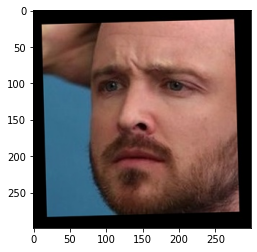

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [ ]:
model = vgg_face()
model.load_weights("vgg_face_weights.h5") 

### Get vgg_face_descriptor

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [ ]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [ ]:
print(embedding_vector)

[ 0.03170307 -0.0150513  -0.01243402 ...  0.00043141  0.00219081
 -0.00908097]


### Generate embeddings for all images (10 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))

In [ ]:
import traceback
count = 0

for i,m in enumerate(metadata):
    try:
        img = load_image(m.image_path())
        img = (img / 255.).astype(np.float32)
        img = cv2.resize(img, dsize = (224,224))
        embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
        embeddings[i]=embedding_vector
    except:
        count = count + 1
        print("The position of embedding is set to zeros is %s" %i)
        embeddings[i] = np.zeros(2622)
        print(embeddings[i])
        
print(count)

0


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

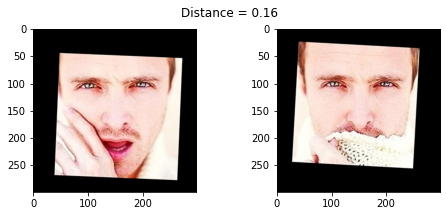

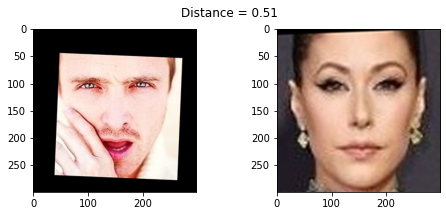

In [ ]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

### Create train and test sets (10 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

In [ ]:
print(y_train.shape, y_test.shape)

(9573,) (1197,)


### Encode the Labels (6 marks)
- Encode the targets
- Use LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
ec = LabelEncoder()
ec.fit(targets)

# Numerical encoding of identities
y = ec.transform(targets)

### Standardize the feature values (6 marks)
- Scale the features using StandardScaler

In [ ]:
# Standarize features
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform (X_test)


### Reduce dimensions using PCA (6 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [ ]:
from sklearn.decomposition import PCA
pc = PCA(n_components = 128)
X_train= pc.fit_transform(X_train)
X_test= pc.transform(X_test)

### Build a Classifier (6 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score

kn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
sv = LinearSVC()

kn.fit(X_train, y_train)
sv.fit(X_train, y_train)

acc_kn = accuracy_score(y_test, kn.predict(X_test))
acc_sv = accuracy_score(y_test, sv.predict(X_test))

print(f'KNN accuracy = {acc_kn}, SVM accuracy = {acc_sv}')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


KNN accuracy = 0.924812030075188, SVM accuracy = 0.9465329991645781


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [ ]:
y_test.shape

(1197,)

In [ ]:
print(y_test[10])
test_idx=10

pins_Alvaro Morte


In [ ]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = sv.predict([embeddings[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');